In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import sklearn
import pickle

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/emails.csv')

In [ ]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB




1.   Data Preprocessing and Exploration



In [ ]:
df.isnull().sum()#no null values

,0
text,0
spam,0


In [ ]:
df['spam'].value_counts()

,count
spam,
0,4360
1,1368


<Axes: xlabel='spam', ylabel='count'>

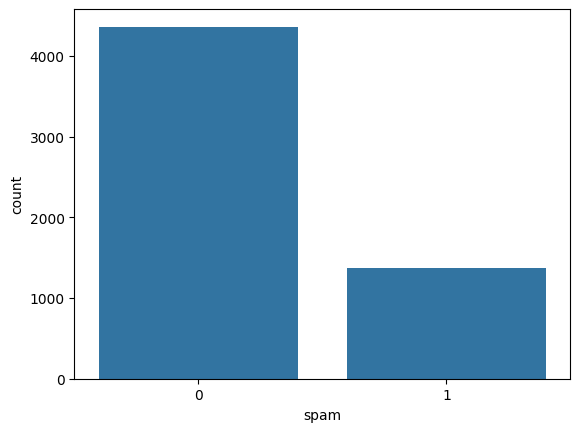

In [ ]:
sns.countplot(x=df['spam'],data=df)

In [ ]:
#1. lowercasing the text column
df['text']=df['text'].str.lower()


In [ ]:
import re
def remove_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'',text)

df['text']=df['text'].apply(remove_tags)

In [ ]:
df['text']

,text
0,subject: naturally irresistible your corporate...
1,subject: the stock trading gunslinger fanny i...
2,subject: unbelievable new homes made easy im ...
3,subject: 4 color printing special request add...
4,"subject: do not have money , get software cds ..."
...,...
5723,subject: re : research and development charges...
5724,"subject: re : receipts from visit jim , than..."
5725,subject: re : enron case study update wow ! a...
5726,"subject: re : interest david , please , call..."


In [ ]:
#removing urls from the text column
def remove_url(text):
  pattern=re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'',text)

df['text']=df['text'].apply(remove_url)

In [ ]:

import re

def remove_punc(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['text'] = df['text'].apply(remove_punc)

In [ ]:
df['text']

,text
0,subject naturally irresistible your corporate ...
1,subject the stock trading gunslinger fanny is...
2,subject unbelievable new homes made easy im w...
3,subject 4 color printing special request addi...
4,subject do not have money get software cds fr...
...,...
5723,subject re research and development charges t...
5724,subject re receipts from visit jim thanks ...
5725,subject re enron case study update wow all ...
5726,subject re interest david please call shi...


In [ ]:
slang_dict = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A** Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A**",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A** Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing"
}


In [ ]:
#replace chat slang words
def replace_slang_words(text):
    new_text = []
    for w in text.split():
        if w.upper() in slang_dict:
            new_text.append(slang_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)  # Join with spaces

df['text']=df['text'].apply(replace_slang_words)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

# Define the stop word removal function using list comprehension
def stop_word_removal(text):
    return " ".join([word for word in text.split() if word not in stop_words])

# Apply the function to your DataFrame
df['text'] = df['text'].apply(stop_word_removal)

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.4 MB/s eta 0:00:00


In [ ]:

import emoji
def remove_emoji(text):
  return emoji.demojize(text)
df['text']=df['text'].apply(remove_emoji)



In [ ]:
import spacy


In [ ]:
# Import necessary libraries
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")  # You might need to download this model first: python -m spacy download en_core_web_sm

# Process the text data using spaCy
docs = list(nlp.pipe(df['text']))

# Extract tokens and store them as strings in a new column
df['tokens4'] = [[token.text for token in doc] for doc in docs]

In [ ]:
with open('nlp_object_tokenization.pkl','wb') as f:
  pickle.dump(nlp,f)

In [ ]:
df['tokens4']

,tokens4
0,"[subject, naturally, irresistible, corporate, ..."
1,"[subject, stock, trading, gunslinger, fanny, m..."
2,"[subject, unbelievable, new, homes, made, easy..."
3,"[subject, 4, color, printing, special, request..."
4,"[subject, money, get, software, cds, software,..."
...,...
5723,"[subject, research, development, charges, gpg,..."
5724,"[subject, receipts, visit, jim, thanks, invita..."
5725,"[subject, enron, case, study, update, wow, day..."
5726,"[subject, interest, david, please, call, shirl..."


In [ ]:
'''from nltk.stem import PorterStemmer

# Initialize the PorterStemmer
stemmer = PorterStemmer()
def apply_stemmer(text):

# Apply stemming to each word
  return  " ".join([stemmer.stem(word) for word in text])

df['tokens4'].apply(apply_stemmer)'''


'from nltk.stem import PorterStemmer\n\n# Initialize the PorterStemmer\nstemmer = PorterStemmer()\ndef apply_stemmer(text):\n\n# Apply stemming to each word\n  return  " ".join([stemmer.stem(word) for word in text])\n\ndf[\'tokens4\'].apply(apply_stemmer)'

In [ ]:
print(df['tokens4'].apply(type).value_counts())


tokens4
<class 'list'>    5728
Name: count, dtype: int64


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tag import pos_tag

# Download necessary NLTK resources if not already downloaded
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt') # This line was added to handle sentence tokenization within pos_tag
nltk.download('averaged_perceptron_tagger_eng') # This line was added to download the missing resource

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


def apply_lemmatizer(tokens):
    """Apply lemmatization to a list of tokens."""
    return [lemmatizer.lemmatize(token, pos='v') for token in tokens]

# Apply the lemmatization function to the 'tokens4' column
df['lemmatized_text'] = df['tokens4'].apply(apply_lemmatizer)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [ ]:
with open('lemmatizer.pkl','wb') as f:
  pickle.dump(lemmatizer,f)

In [ ]:
df['lemmatized_text']

,lemmatized_text
0,"[subject, naturally, irresistible, corporate, ..."
1,"[subject, stock, trade, gunslinger, fanny, mer..."
2,"[subject, unbelievable, new, home, make, easy,..."
3,"[subject, 4, color, print, special, request, a..."
4,"[subject, money, get, software, cds, software,..."
...,...
5723,"[subject, research, development, charge, gpg, ..."
5724,"[subject, receipt, visit, jim, thank, invitati..."
5725,"[subject, enron, case, study, update, wow, day..."
5726,"[subject, interest, david, please, call, shirl..."


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Create a dictionary (vocabulary) from the spaCy tokens
word_index = {}
for sentence in df['lemmatized_text']:  # Loop through each row in the lemmatized text column
    for token in sentence:
        if token not in word_index:
            word_index[token] = len(word_index) + 1  # Assign a unique integer to each token

# Step 2: Convert the tokens in the 'lemmatized_text' column to integer sequences
def tokens_to_sequence(tokens):
    return [word_index.get(token, 0) for token in tokens]  # Default to 0 for unknown words

# Convert the entire 'lemmatized_text' column to sequences of integers
sequences = df['lemmatized_text'].apply(tokens_to_sequence)

# Step 3: Pad sequences to ensure uniform length (e.g., 100 tokens per sequence)
X = pad_sequences(sequences, padding='post', maxlen=100)  # Adjust maxlen as necessary


In [ ]:
with open('word_index.pkl','wb') as f:
  pickle.dump(word_index,f)

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into training and validation sets

X_train, X_test, y_train, y_test=train_test_split(X, df['spam'], test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val =train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:


# Step 2: Define the model (as explained earlier)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=300),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['precision'])

# Step 4: Train the model on the training data and evaluate on the validation set
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - loss: 0.5655 - precision: 0.4943 - val_loss: 0.2312 - val_precision: 0.7923
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - loss: 0.1580 - precision: 0.9099 - val_loss: 0.0850 - val_precision: 0.8934
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - loss: 0.0719 - precision: 0.9361 - val_loss: 0.0561 - val_precision: 0.9611
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - loss: 0.0262 - precision: 0.9835 - val_loss: 0.0775 - val_precision: 0.9701
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - loss: 0.0324 - precision: 0.9758 - val_loss: 0.0554 - val_precision: 0.9663
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - loss: 0.0232 - precision: 0.9850 - val_loss: 0.0543 - val_precision: 0.9665
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - loss: 0.0101 - precision: 0.9954 - val_loss: 0.0557 - val_precision: 0.9615
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - loss: 0.0060

In [ ]:
model.save("spam_email.keras")

In [ ]:
model.evaluate(X_test,y_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0654 - precision: 0.9892


[0.04920085892081261, 0.9860788583755493]

In [ ]:
y_prediction=model.predict(X_test)
y_pred=(y_prediction > 0.5).astype(int)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
from sklearn.metrics import classification_report



# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1278
           1       0.99      0.96      0.97       441

    accuracy                           0.99      1719
   macro avg       0.99      0.98      0.98      1719
weighted avg       0.99      0.99      0.99      1719



In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00


In [ ]:
# prompt: now generate code to input text from user using streamlit and apply all those steps applied to prprocess the text column so apply all of them on the user input and for prediction use model which i will save dont worry
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import emoji
import pickle
#import spacy
#from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Download necessary NLTK data (only if not already downloaded)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)



# Load the saved model (replace 'your_model.h5' with the actual filename)
@st.cache_resource
def load_spam_model():
    return load_model("/content/spam_email.keras")

@st.cache_resource
def load_word_index():
    with open("word_index.pkl", "rb") as f:
        return pickle.load(f)



# Preprocessing functions (same as in your notebook)
def remove_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

def remove_punc(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

slang_dict = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A** Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A**",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A** Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing"
}
 # Your slang dictionary from the notebook


#replace chat slang words
def replace_slang_words(text):
    new_text = []
    for w in text.split():
        if w.upper() in slang_dict:
            new_text.append(slang_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)  # Join with spaces

 # ... your slang replacement function ...} # Your slang replacement function from the notebook

stop_words = set(stopwords.words('english'))
def stop_word_removal(text):
    return " ".join([word for word in text.split() if word not in stop_words])

def remove_emoji(text):
  return emoji.demojize(text)

def apply_lemmatizer(tokens):

    with open('lemmatizer.pkl','rb') as f:
      lemmatizer=pickle.load(f)
    return [lemmatizer.lemmatize(token, pos='v') for token in tokens]



def preprocess_text(text):
    text = text.lower()
    text = remove_tags(text)
    text = remove_url(text)
    text = remove_punc(text)
    text = replace_slang_words(text)
    text = stop_word_removal(text)
    text = remove_emoji(text)
    with open('nlp_object_tokenization.pkl','rb') as f:
      nlp=pickle.load(f)
    doc = nlp(text)
    tokens = [token.text for token in doc]
    lemmatized_tokens = apply_lemmatizer(tokens)
    return lemmatized_tokens


def predict(text):
    word_index1=load_word_index()
    processed_text = preprocess_text(text)
    sequence = [word_index1.get(token, 0) for token in processed_text]
    padded_sequence = pad_sequences([sequence], padding='post', maxlen=100)
    model=load_spam_model()  # Adjust maxlen if needed
    prediction = model.predict(padded_sequence)[0][0]
    return prediction

# Streamlit app
st.title("Spam Email Classifier")

user_input = st.text_area("Enter email text:", "")

if st.button("Predict"):
    if user_input:
        prediction = predict(user_input)
        if prediction > 0.5:
            st.error("Spam")
        else:
            st.success("Not Spam")
    else:
        st.warning("Please enter some text")


Overwriting app.py


In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok

# Set your Ngrok authtoken (replace 'your_auth_token' with the copied token)
ngrok.set_auth_token('2bOYa4qRr7z4K3HOLkfhBIJgRPB_5Th4f73XnfSqFC8oG4o8S')

# Set up the Ngrok tunnel to the Streamlit app
# The port number should be included in the 'addr' argument
public_url = ngrok.connect(addr='http://localhost:8501')
print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://bc0c-34-125-81-59.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!streamlit run app.py &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.81.59:8501

2025-02-01 09:22:49.537406: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738401769.580599    4747 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738401769.596409    4747 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-01 09:23:10.633999: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
2025-02-01 09:23:12.958 Examining the path